In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
import math 
import os
print(cv2.__version__)

4.3.0


This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


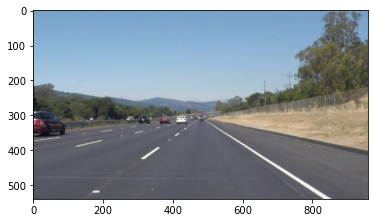

In [4]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')
img = np.copy(image)
#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', img.shape)
plt.imshow(image)
ysize = img.shape[0]
xsize = img.shape[1]

In [5]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(),
    
    `initial_img` should be the image before any processing.
    
    
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

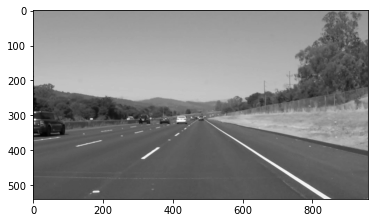

In [6]:
gray_image = grayscale(img)
plt.imshow(gray_image,cmap = 'gray')

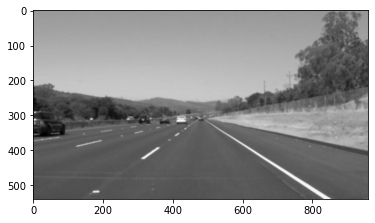

In [7]:
blur_gray_image = gaussian_blur(gray_image, 5)
plt.imshow(blur_gray_image,cmap='gray')

In [8]:
low_threshold_canny = 40
high_threshold_canny = 150

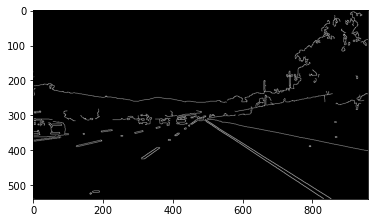

In [9]:
edge_image = canny(blur_gray_image,low_threshold_canny,high_threshold_canny)
plt.imshow(edge_image,cmap='gray')

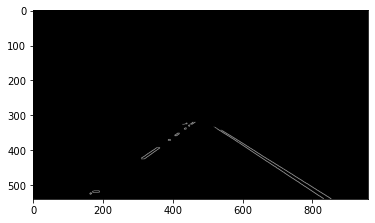

In [10]:
vertices = np.array([[(0,ysize),(440, 320), (490, 320), (xsize,ysize)]], dtype=np.int32)
masked_image = region_of_interest(edge_image,vertices)
plt.imshow(masked_image,cmap = 'gray')

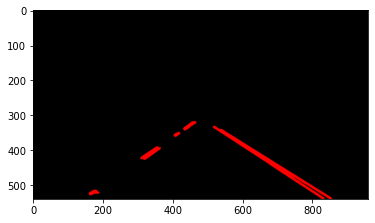

In [11]:
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold_hough = 17    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10 #minimum number of pixels making up a line
max_line_gap = 10   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 

lines_image = hough_lines(masked_image,rho,theta,threshold_hough, min_line_length, max_line_gap)
plt.imshow(lines_image, cmap='gray')

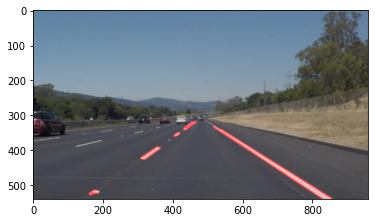

In [12]:
color_edges =  np.dstack((edge_image,edge_image,edge_image))
lines_edges_image = weighted_img(lines_image,image)
plt.imshow(lines_edges_image)

In [13]:
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

test_images/solidWhiteCurve.jpg


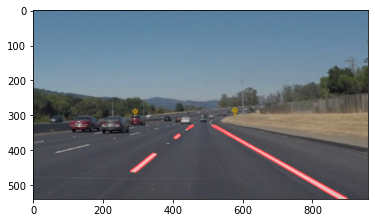

test_images/solidWhiteRight.jpg


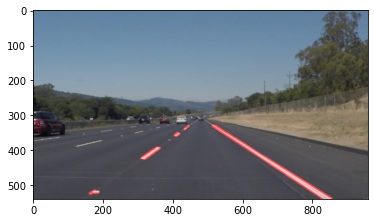

test_images/solidYellowCurve.jpg


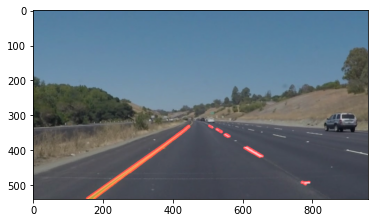

test_images/solidYellowCurve2.jpg


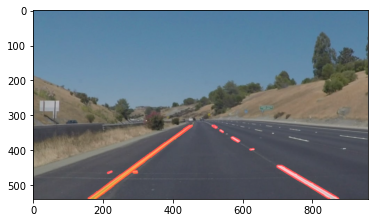

test_images/solidYellowLeft.jpg


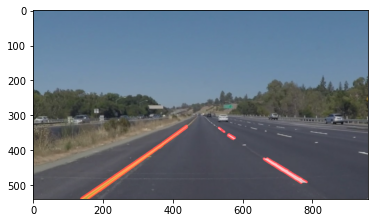

test_images/whiteCarLaneSwitch.jpg


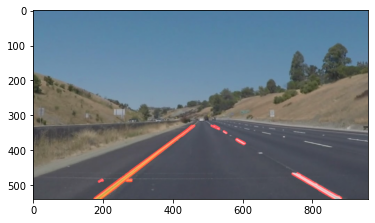

In [14]:
for name in os.listdir("test_images/"):
    print('test_images/'+ name)
    image = mpimg.imread('test_images/'+ name)
    img = np.copy(image)
    ysize = img.shape[0]
    xsize = img.shape[1]
    gray_image = grayscale(img)
    blur_gray_image = gaussian_blur(gray_image, 5)
    low_threshold_canny = 50
    high_threshold_canny = 150
    edge_image = canny(blur_gray_image,low_threshold_canny,high_threshold_canny)
    vertices = np.array([[(0,ysize),(440, 330), (550, 330), (xsize,ysize)]], dtype=np.int32)
    masked_image = region_of_interest(edge_image,vertices)
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold_hough = 15    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 8 #minimum number of pixels making up a line
    max_line_gap = 6   # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 
    lines_image = hough_lines(masked_image,rho,theta,threshold_hough, min_line_length, max_line_gap)
    color_edges =  np.dstack((edge_image,edge_image,edge_image))
    lines_edges_image = weighted_img(lines_image,image)
    plt.imshow(lines_edges_image)
    mpimg.imsave('test_images_output/_'+name,lines_edges_image)
    plt.show('hold')
    

# Video test

In [15]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [23]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    img = np.copy(image)
    ysize = img.shape[0]
    xsize = img.shape[1]
    gray_image = grayscale(img)
    blur_gray_image = gaussian_blur(gray_image, 5)
    low_threshold_canny = 70
    high_threshold_canny = 150
    edge_image = canny(blur_gray_image,low_threshold_canny,high_threshold_canny)
    vertices = np.array([[(0,ysize),(440, 330), (550, 330), (xsize,ysize)]], dtype=np.int32)
    masked_image = region_of_interest(edge_image,vertices)
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold_hough = 15    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 8 #minimum number of pixels making up a line
    max_line_gap = 6   # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 
    lines_image = hough_lines(masked_image,rho,theta,threshold_hough, min_line_length, max_line_gap)
    color_edges =  np.dstack((edge_image,edge_image,edge_image))
    lines_edges_image = weighted_img(lines_image,image)
    plt.imshow(lines_edges_image)
    
    return lines_edges_image

In [24]:
white_output = 'test_videos_output/solidWhiteRight.mp4'

t:   1%|█▋                                                                                                                            | 3/221 [00:00<00:07, 28.34it/s, now=None]

Moviepy - Building video test_videos_output/solidWhiteRight.mp4.
Moviepy - Writing video test_videos_output/solidWhiteRight.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidWhiteRight.mp4
Wall time: 5.69 s


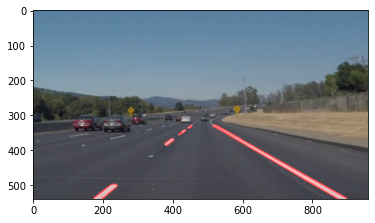

In [25]:
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

t:   0%|▌                                                                                                                             | 3/681 [00:00<00:25, 27.02it/s, now=None]

Moviepy - Building video test_videos_output/solidYellowLeft.mp4.
Moviepy - Writing video test_videos_output/solidYellowLeft.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidYellowLeft.mp4
Wall time: 17.8 s


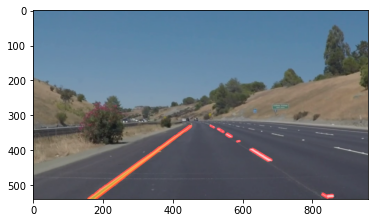

In [27]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))